# Исследование рынка компьютерных игр

Целью данного исследования является выявление факторов, определяющих коммерческую успешность игры.

В ходе исследования будет состален портерет пользователя каждого региона и проверены две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Резальтаты, полученные в ходе анализа, будут исполльзованы при выборе потенциально популярного продукта для проведения рекламной кампании.
 

### Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

- В 6-ти столбцах есть пустые значения;
- В названиях столбцов присутствуют заглавные буквы;
- Год приведем к целочисленному типу даных;
- Стобец `User_Score`имеет тип данных object. Необходимо изменить тип данных, чтобы можно было проводить математическоие операции с значениями в столбце.

### Предобработка данных

In [3]:
#Приведем названия столбцов к нижнему регистру
data.columns=data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` присутсвует аббревиатуру `tbd`. Эта аббревиатура означает `To Be Determined`, т.е. рейтинг еще не присвоен. Значит `tbd` эквивалентна пустому значению. Избавимся от `tbd`, приобразовав тип данных столбца в числовой. Параметр `errors 'coerce’` заменит `tbd` на NaN.

In [5]:
#Избавимся от пропусков в стоблце с годом запуска и заменим тип данных на int
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release']=data['year_of_release'].astype('int32')
#Заменим тип данных в стоблце user_score на числовой
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Критичными являются пропуски в столбце с названием игры и годом выпуска. Название и год ничием не заменишь, поэтому удалим эти строки.

Пропущенные значения в стоблцах с числовым рейтингом могут означать, что игра вообще не оценивалась пользователями, либо по какой-то технической причине данные не попали в датасет. Оставим эти пропуски, как есть. 

Пропуски в столбце `rating` заменим на undefined, чтобы в дальниейшем можно было группирвоать данные по этому столбцу.

Два пропущенных значения в столбце жанр скорее всего связаны с пропущенными значениями в столбце с названием игры. Проверим.

In [6]:
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data = data.dropna(subset=['name']).reset_index(drop=True)
data['rating'] = data['rating'].fillna('undefined')
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Таким образом, была удалена 271 строка (<2% данных).**

In [8]:
#Проверим наличие строк-дублей и дубликтов по связке столбцов
display(data.duplicated().sum())
data.loc[data.duplicated(subset=['name','platform', 'year_of_release'], keep=False)]

0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [9]:
#Оставим первую строку, т.к. она содержит больше информации о продажах
data = data.drop_duplicates(subset=['name','platform', 'year_of_release'], keep='first').reset_index(drop=True)
data.loc[(data['name']=='Madden NFL 13') & (data['platform']=='PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


In [10]:
#Добавим столбец с суммарными продажами
data['total_sales'] = data[['na_sales','eu_sales', 'jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Вывод**

На этапе предобработки были внесены следующие изменения а датафрейм:

- названия столбцов приведены к нижнему регистру 
- изменены типы данных в столбцах `year_of_release` на int и `user_score` на float
- удалены строки с пропусками в столбцах `name` и `year_of_release`
- пропуски в столбце `rating` заменены на `undefined`
- удалены дубликаты данных
- добавлен новый столбец с суммарными продажи во всех регионах

### Исследовательский анализ данных

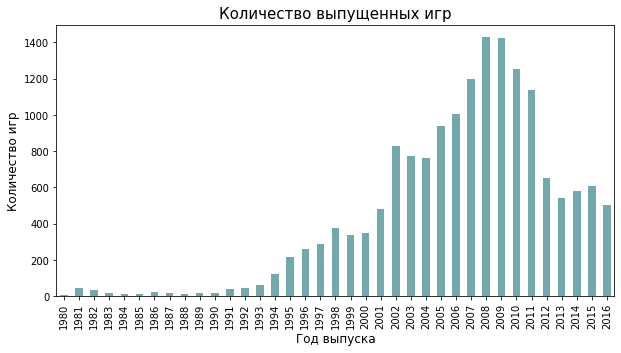

In [11]:
# Посмотрим сколько игр выпускалось в разные годы
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(10, 5), color='#73A9AD')
plt.title('Количество выпущенных игр', size=15)
plt.xlabel('Год выпуска', size=12)
plt.ylabel('Количество игр', size=12)
plt.show()

До 1994 г. выпускалось меньше 100 игр. Период с 2006-2011 самый ативный - выпускалось более 1000 игр каждый год. Больше всего игр было выпущено в 2008 и 2009 гг.

In [12]:
#Выберем платформы с наибольшими суммарными продажами
data.groupby('platform')['total_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.33
X360     961.24
PS2     1233.56
Name: total_sales, dtype: float64

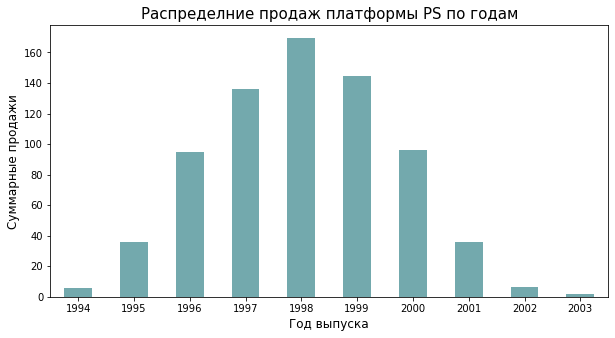

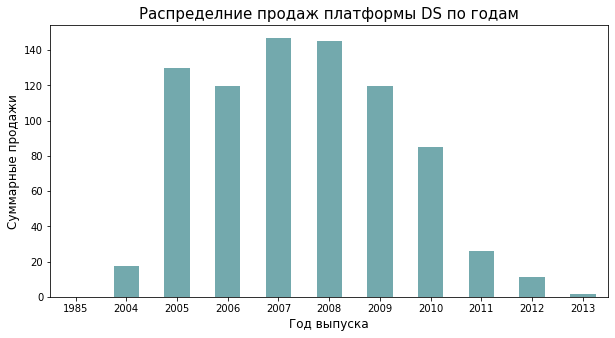

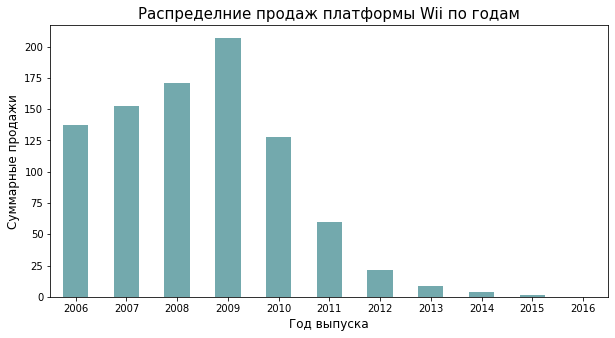

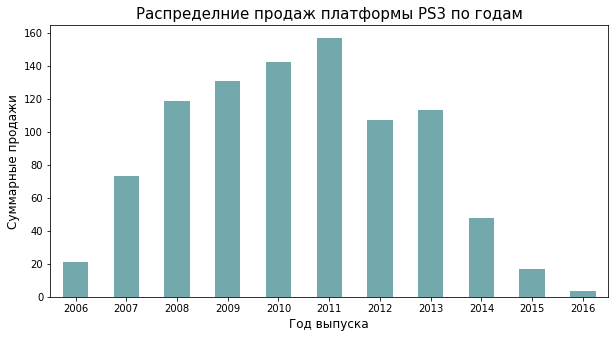

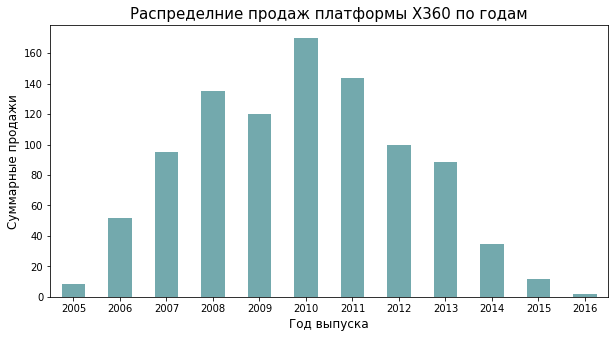

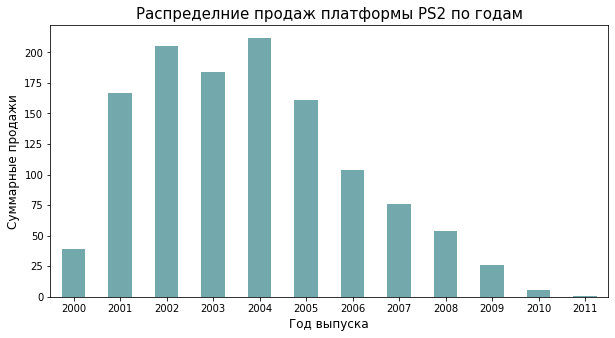

In [13]:
platforms=['PS','DS','Wii', 'PS3', 'X360', 'PS2']

for i in platforms:
    data.loc[data['platform']==i].\
    groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar', figsize=(10, 5), color='#73A9AD')
    plt.xticks(rotation=0)
    plt.title(f'Распределние продаж платформы {i} по годам', size=15)
    plt.xlabel('Год выпуска', size=12)
    plt.ylabel('Суммарные продажи', size=12)
    plt.show()

Платформы функционируют по 10-12 лет. Первые 5-6 лет идет активный рост продаж игр, после чего начинается постепенный спад. 3 из 6 платформ уже не работают в 2016 г. Нам необходимо сделать прогноз на 2017 г, поэтому возьмем самые актуальные для бизнеса данные - за последние 4 года.

In [14]:
data_relevant = data.loc[data['year_of_release']>=2013].reset_index(drop=True)
#data_relevant.groupby('platform')['total_sales'].sum().sort_values()
data_relevant.groupby('platform')['total_sales'].count()

platform
3DS     303
DS        8
PC      189
PS3     345
PS4     392
PSP      67
PSV     358
Wii      23
WiiU    115
X360    186
XOne    247
Name: total_sales, dtype: int64

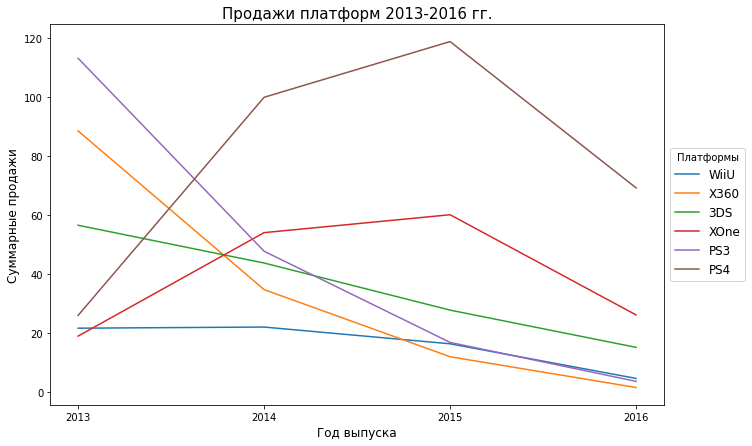

In [15]:
#Проанализируем топ 6 платформ по рейтингу продаж
new_list = ['WiiU', 'X360', '3DS', 'XOne', 'PS3', 'PS4']
for i in new_list:
    data_relevant.loc[data_relevant['platform']==i].\
    groupby(['year_of_release'])['total_sales'].sum().plot(figsize=(11, 7), label = i)
    plt.xticks(rotation=0)
    plt.title('Продажи платформ 2013-2016 гг.', size=15)
    plt.xlabel('Год выпуска', size=12)
    plt.ylabel('Суммарные продажи', size=12)
    plt.legend(title="Платформы", loc="center left", prop = {'size': 12}, bbox_to_anchor=(1, 0, 0.5, 1))
    plt.xticks([2013, 2014, 2015, 2016]);

Лидерами продаж за период 2013-2016 гг являются платформы: WiiU, X360, 3DS, XOne, PS3, PS4. Самую большую долю на рынке занимает PS4. В 2016 г наблюдается спад продаж всех платформ, однако, это скорее всего связано с неполными данными за 2016 г. У двух платформ PS4 и XOne виден значительный рост продаж за 2013-2015 гг, в 2016 г они также являются лидерами по продажам игр. Продажи WiiU стабильны на протяжении всего анализируемого периода, у всех остальных платформ наблюдается падение. Платформа PS4 сокрее всего забрала себе часть продаж более старой платформы PS3. Резкий рост продаж PS4 сопровождается таким же резким падением продаж PS3.

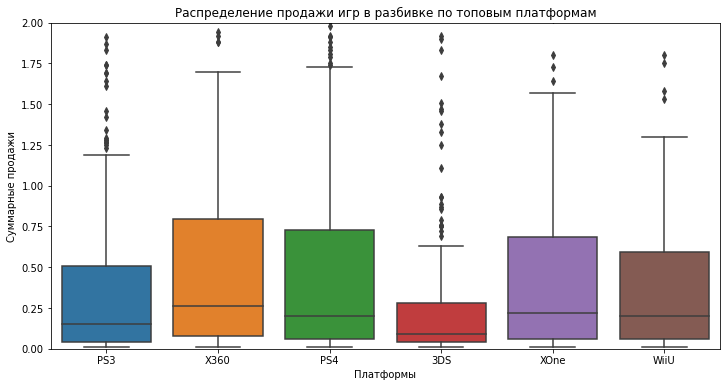

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_relevant.query('platform in @new_list'), y = 'total_sales', x='platform').set\
(title = 'Распределение продажи игр в разбивке по топовым платформам', xlabel = 'Платформы', ylabel = 'Суммарные продажи')
plt.ylim(0, 2);

У всех платформ есть выбросы данных, что указывает на ниличие популярных игр с высокими продажами на всех 6 платформах. Межквртильных размах платформы 3DS значительно уже остальных платформ, что говорит об однородности продаж. Медиана у всех платформ смещена вниз, что указывает на большое количество игр с низкими продажами.

**Проверим, как влияют на продажи, отзывы пользователей и критиков**

In [17]:
#Найдем коэффициенты корреляции для платформы PS4
def kor(p):
    print(f'Коэффициент корреляции продаж {p} и рейтинга пользователей: \
    {data_relevant.loc[data_relevant["platform"]==p]["total_sales"].corr(data_relevant.loc[data_relevant["platform"]==p]["user_score"])}')
    print(f'Коэффициент корреляции продаж {p} и рейтинга критиков: \
    {data_relevant.loc[data_relevant["platform"]==p]["total_sales"].corr(data_relevant.loc[data_relevant["platform"]==p]["critic_score"])}')

kor("PS4")

Коэффициент корреляции продаж PS4 и рейтинга пользователей:     -0.031957110204556376
Коэффициент корреляции продаж PS4 и рейтинга критиков:     0.406567902061781


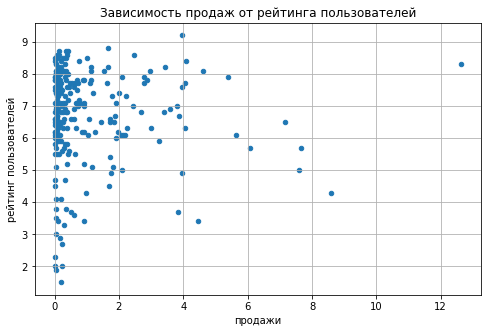

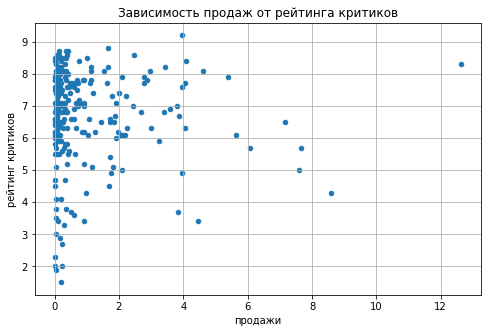

In [18]:
data_relevant.query('platform=="PS4"').\
plot(x='total_sales', y='user_score', kind='scatter', \
     grid=True, title='Зависимость продаж от рейтинга пользователей', \
     xlabel='продажи', ylabel='рейтинг пользователей', figsize=(8, 5))
data_relevant.query('platform=="PS4"').\
plot(x='total_sales', y='user_score', kind='scatter', \
     grid=True, title='Зависимость продаж от рейтинга критиков', \
     xlabel='продажи', ylabel='рейтинг критиков', figsize=(8, 5))
plt.show()

Прямой зависимости между оценками пользователей и продажами не наблюдается.

Оценки критиков оказывают влияние на продажи, хоть и несильное.

Проверим данные выводы на других платформах.

In [19]:
plat=['WiiU', 'X360', '3DS', 'XOne', 'PS3']
for i in plat:
    kor(i)
    print()

Коэффициент корреляции продаж WiiU и рейтинга пользователей:     0.4193304819266187
Коэффициент корреляции продаж WiiU и рейтинга критиков:     0.3764149065423912

Коэффициент корреляции продаж X360 и рейтинга пользователей:     -0.011742185147181342
Коэффициент корреляции продаж X360 и рейтинга критиков:     0.3503445460228664

Коэффициент корреляции продаж 3DS и рейтинга пользователей:     0.24150411773563016
Коэффициент корреляции продаж 3DS и рейтинга критиков:     0.35705661422881035

Коэффициент корреляции продаж XOne и рейтинга пользователей:     -0.06892505328279412
Коэффициент корреляции продаж XOne и рейтинга критиков:     0.41699832800840175

Коэффициент корреляции продаж PS3 и рейтинга пользователей:     0.0023944027357566925
Коэффициент корреляции продаж PS3 и рейтинга критиков:     0.3342853393371919



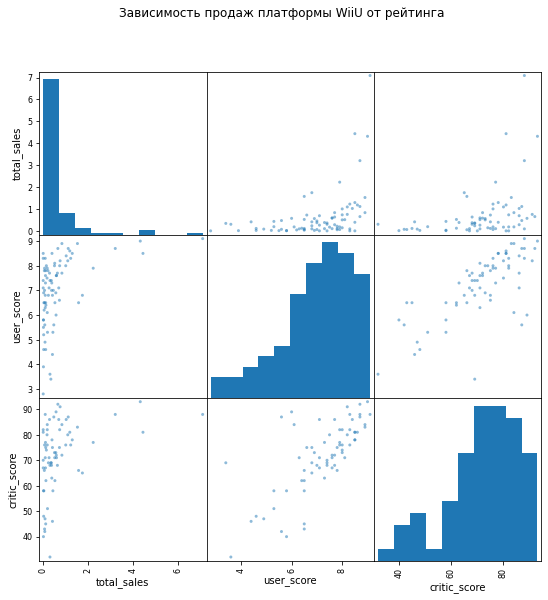

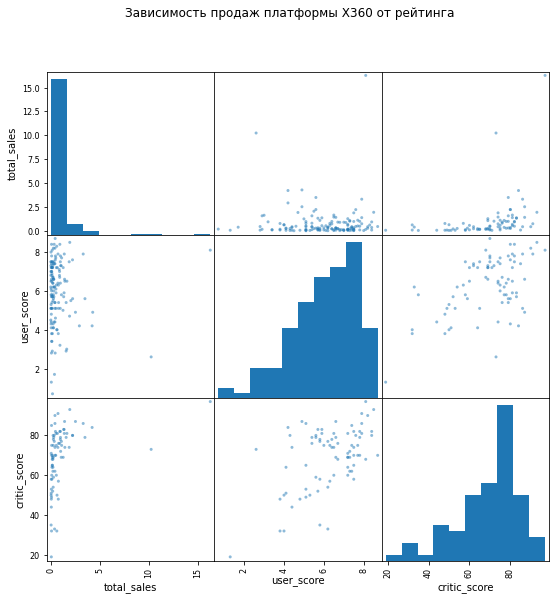

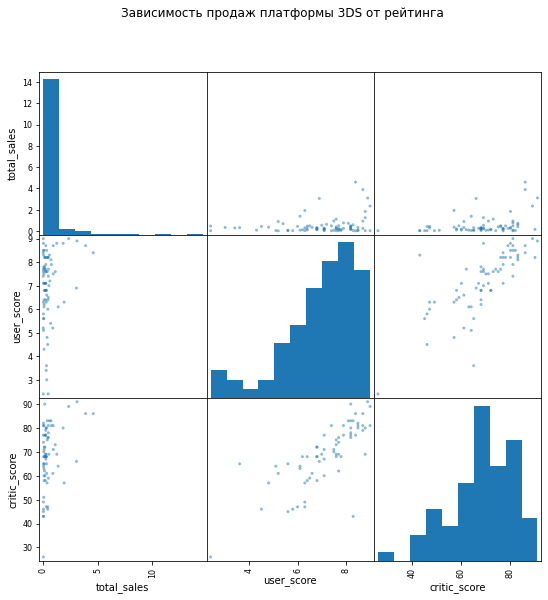

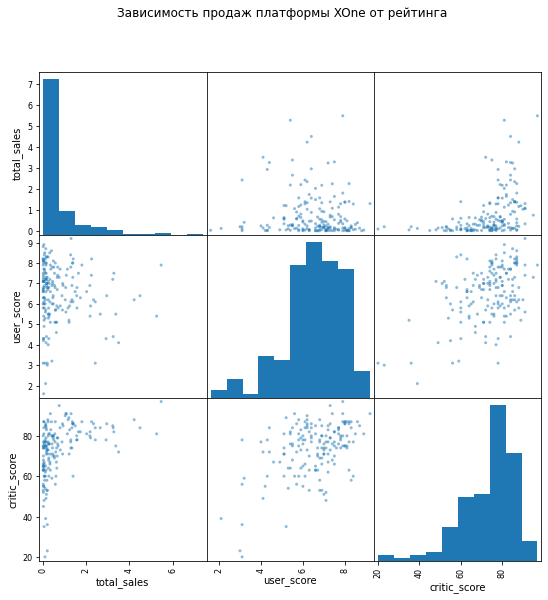

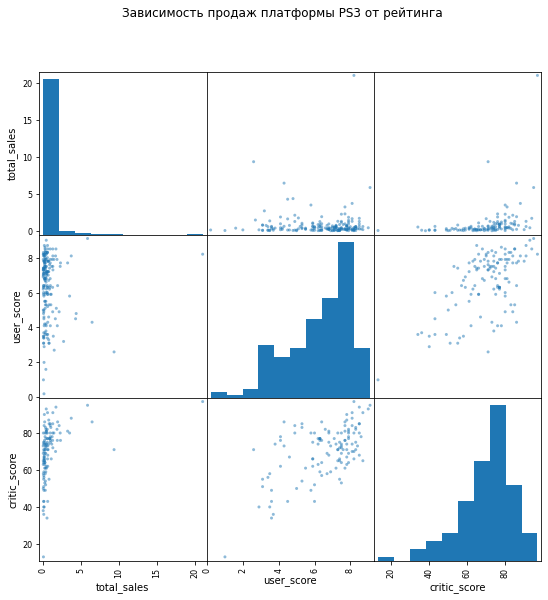

In [20]:
#Построим диаграммы рассеяния для остальных платформ

for i in plat:
    data_corr=data_relevant.query('platform==@i')[['total_sales','user_score', 'critic_score']]
    pd.plotting.scatter_matrix(data_corr, figsize=(9, 9)) 
    plt.suptitle(f'Зависимость продаж платформы {i} от рейтинга')
    plt.show()
    

 Наши выводы подвердилсь на всех платформах, кроме WiiU. Для данной платформы влияние оценок пользователей оказалось сильнее, чем критиков. Для остальных платформ характерно более сильное влияние на продажи рейтинга критиков.

**Посмотрим на общее распеределение игр по жанрам. Найдем самые прибыльные и наименее прибыльные жанры игр.**

,суммарные_продажи,доля в продажах
genre,,
Puzzle,3.17,0.29%
Strategy,10.08,0.92%
Simulation,21.76,2.00%
Adventure,23.64,2.17%
Fighting,35.31,3.24%
Racing,39.89,3.66%
Platform,42.63,3.91%
Misc,62.82,5.76%
Role-Playing,145.89,13.38%


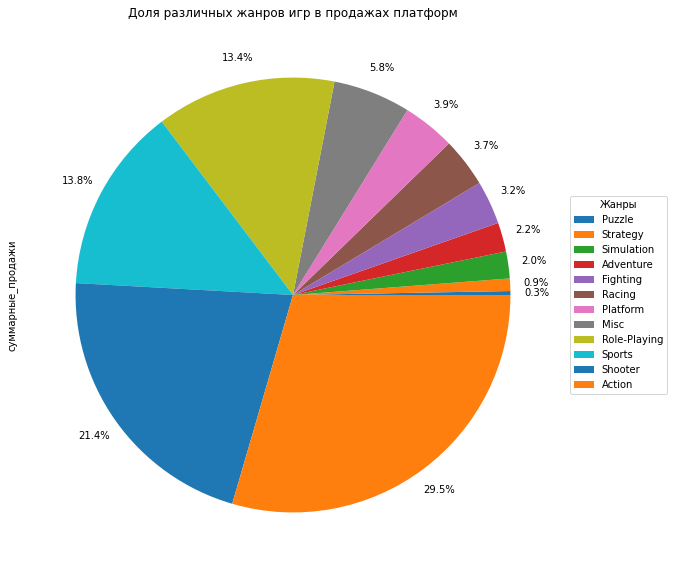

In [21]:
data_genre = data_relevant.groupby(['genre']).agg({'total_sales':'sum'}).sort_values(by='total_sales')
data_genre.columns = ['суммарные_продажи']
data_genre['доля в продажах'] = data_genre['суммарные_продажи']/data_genre['суммарные_продажи'].sum()
data_genre['доля в продажах'] = data_genre['доля в продажах'].map(lambda n: '{:,.2%}'.format(n))
display(data_genre)

data_genre.plot.pie(y='суммарные_продажи',figsize=(10, 10), autopct='%1.1f%%', labels=None, pctdistance=1.12)
plt.title('Доля различных жанров игр в продажах платформ')
plt.legend(labels=data_genre.index, title="Жанры", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Если судить по суммарным продажам, наиболее популярными жанрами, которые приносят практичеки 80% выручки всех платформ, являются `Action`, `Shooter`, `Sports`, `Role-Playing`. Наимее прибыльными являются жанры: `Puzzle	`, `Strategy`. Однако, такая большая доля в продажах может быть связана не с предпочтениями покупателей, а просто большим количеством игр этих жанров. Поэтому рассмотрим медианные продажи каждого жанра.

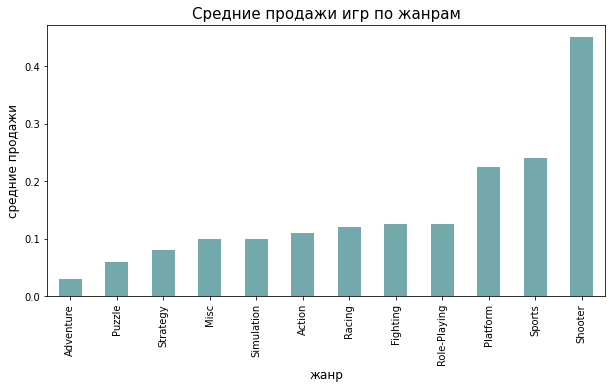

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: name, dtype: int64

In [31]:
#Посчитаем медианные продажи по жанрам
data_relevant.groupby(['genre'])['total_sales'].median().sort_values().\
plot(kind='bar', figsize=(10, 5), color='#73A9AD')
plt.title('Средние продажи игр по жанрам', size=15)
plt.xlabel('жанр', size=12)
plt.ylabel('средние продажи', size=12)
plt.show()

#Проверим количество игр каждого жанра
data_relevant.groupby(['genre'])['name'].count().sort_values(ascending=False)

Если оценивать продажи игр по медиане, то сразу видно 3 явных лидера: `Shooter`, `Sports`, `Platform`. Успех жанра `Action` в предыдущих расчетах был связан с большим количеством выпущенных игр на всех платформах. Игр жанра `Action` практически в 4 раза больше, чем игр жанра `Shooter`.

### Портрет пользователя каждого региона

**Опередлим для пользователей каждого региона (NA, EU, JP) топ-5 самых популярных платформ.**

In [ ]:
data_pivoted = data_relevant.pivot_table(
    index='platform',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc = 'sum'
).apply(
    lambda x: x / x.sum(),
    axis=0
).round(4)

display('Северная Америка:')
display(data_pivoted['na_sales'].sort_values(ascending=False).head(5))
display('Европа:')
display(data_pivoted['eu_sales'].sort_values(ascending=False).head(5))
display('Япония:')
display(data_pivoted['jp_sales'].sort_values(ascending=False).head(5))

В Европе и Северной Америке самой популярной платформой являтся `PS4`. В Японии эта платформа зпнимает 4-е место по популярности. Абсолютным лидором среди японских пользователей является платформа 3DS (на ее долю приходится почти 50% продаж всех игр). При этом в двух других регионах она на 5-м месте. Предпочтения пользователей в Европе и Северной Америке очень схожи.

**Опередлим для пользователей каждого региона (NA, EU, JP) топ-5 самых популярных жанров.**

In [ ]:
data_pivoted = data_relevant.pivot_table(
    index='genre',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc = 'sum'
).apply(
    lambda x: x / x.sum(),
    axis=0
).round(4)

display('Северная Америка:')
display(data_pivoted['na_sales'].sort_values(ascending=False).head(5))
display('Европа:')
display(data_pivoted['eu_sales'].sort_values(ascending=False).head(5))
display('Япония:')
display(data_pivoted['jp_sales'].sort_values(ascending=False).head(5))

Как и в случае с платформой жанровые предпочтения пользователей из Европы и Северной Америки очень схожи. Отличие только в 5-ом месте. В Северной Америке на 5-м месте жанр `Misc`, а в Европе-`Racing `. На первом месте в этих регионах жанр `Action`.

В Японии `Action` занимает 2-е место, а на 1-м месте - `Role-Playing`.

В целом, если запускать одинаковую рекламную акцию для всех регионов, то лучше сделать стаквку на жанр `Action`, т.к. доля этого жанра в продажах значительна во всех трех регионах.

**Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [ ]:
data_relevant.pivot_table(
    index='rating',
    values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc = 'sum'
).apply(
    lambda x: x / x.sum(),
    axis=0
).round(4)

Для начала определим, как расшифровываются аббревиатуры рейтинга `ESRB`:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «M» («Mature») — «Для взрослых»
- «T» («Teen») — «Для подростков»

В Японии для большей части игр рейтинг не опеределен. Вполне возможно, что рейтинг местным играм присваивается какой-либо другой организацией. Либо присваивание рейтинга не требуется по местному законодательству. Или же это какая-то массовая техническая ошибка при сборе или выгрузке данных.

На Европейской и Северо-Американском рынках лидируют по продажам игры для взрослой категории граждан «M». Данный рейтинг присваиваается по больешй части играм жанра `Action` и `Shooter`, которые являются лидерами продаж, согласно ранее сделанному анализу.

### Проверка гипотез

**Гипотеза 1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Необходимо проверить двухстороннюю гипотезу.

Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). Т.к величина выборок у нас отличается, то будем применять equal_var=False.

Продолжим работать с датафреймом data_relevant, содержащим данные за 2013-16 гг.

In [ ]:
#Уберем пустые значения в столбце с рейтингом для проверки гипотез

xbox_one = data_relevant.loc[(data_relevant['platform'] == 'XOne') \
                             & ~(data_relevant['user_score'].isna())]['user_score'].reset_index(drop=True)

pc = data_relevant.loc[(data_relevant['platform'] == 'PC') \
                             & ~(data_relevant['user_score'].isna())]['user_score'].reset_index(drop=True)
display(len(xbox_one),len(pc))

In [ ]:
#Проверка гипотезы
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(xbox_one, pc, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Полученное значение p-value равно почти 15%. Это явно слишком большая вероятность, чтобы делать вывод о том, что средние пользовательские рейтинги платформ не равны.

**Гипотеза 2 Средние пользовательские рейтинги жанров Action и Sports разные**

Необходимо проверить двухстороннюю гипотезу.

Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H1: Средние пользовательские рейтинги жанров Action и Sports разные

Величина выборок у нас значительно отличается (более, чем в 2 раза), поэтому будем применять equal_var=False.

In [ ]:
action = data_relevant.loc[(data_relevant['genre'] == 'Action') \
                             & ~(data_relevant['user_score'].isna())]['user_score'].reset_index(drop=True)

sports = data_relevant.loc[(data_relevant['genre'] == 'Sports') \
                             & ~(data_relevant['user_score'].isna())]['user_score'].reset_index(drop=True)
display(len(action),len(sports))

In [ ]:
#Проверка гипотезы
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Значит срдние рейтинги жанров Action и Sports различны.

### Общий вывод

Были получены исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах в различных регионах. Основной задачей исселдования было выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Для анализа был взят период с 2013-2016 гг., как самый релевантный.

**На этапе предобработки были внесены следующие изменения в данные:**

- названия столбцов приведены к нижнему регистру 
- изменены типы данных в столбцах `year_of_release` на int и `user_score` на float
- удалены строки с пропусками в столбцах `name` и `year_of_release`
- пропуски в столбце `rating` заменены на `undefined`
- удалены дубликаты данных
- добавлен новый столбец с суммарными продажи во всех регионах

**Выводы**

- Лидерами продаж являются платформы: WiiU, X360, 3DS, XOne, PS3, PS4. Самую большую долю на рынке занимает PS4.
- Для всех платформ, кроме WiiU, отсутсвует прямая зависимость между оценками пользователей и продажами. Оценки критиков оказывают влияние на продажи, хоть и несильное. Для WiiU влияние оценок пользователей оказалось сильнее, чем критиков.
- Наиболее прибыльными жанарми, которые приносят практичеки 80% выручки всех платформ, являются `Action`, `Shooter`, `Sports`, `Role-Playing`. Такая высокая выручка связана не с предпочтениями покупателей, а с большим количеством игр, которые выпускаются в этих жанрах. Наименее прибыльными являются жанры: `Puzzle	`, `Strategy`.
- Если оценивать продажи игр по медиане, то сразу видно 3 явных лидера: Shooter, Sports, Platform.
- Предпочтения пользователей в Европе и Северной Америке очень схож, а рынок Японии занчительно от них отличается:
 - В Европе и Северной Америке самой популярной платформой являтся `PS4`, а самым популярным жанром `Action`.
 - В Японии абсолютным лидером является платформа 3DS (на ее долю приходится почти 50% продаж всех игр), а самым популярным жанром `Role-Playing`.
 - На Европейской и Северо-Американском рынках лидируют по продажам игры для взрослой категории граждан «M».
 - В Японии для большей части игр рейтинг не опеределен, поэтому не удалось сделать выводы относительно влияния рейтинга ESRB на продажи игр.
- Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не опреовергнута.
- Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

**Рекомендации**

В сявзи с тем, что предпочтения пользователей в Европе и Северной Америке очень схожи, то для данных регинов может быть запущена одна маркетинговая акция. Что же касается рынка Японии, то необходимо разработать акцию, с учетом предпочтений пользователей данного региона, т.к. в Японии очень много своих локальных особенностей.

В целом, если запускать одинаковую рекламную акцию для всех регионов, то лучше сделать стаквку на жанр `Action`, т.к. доля этого жанра в продажах значительна во всех трех регионах.